In [123]:
import pandas as pd 

mises_refs_df = pd.read_csv("../data/processed/mises_refs.csv")

In [124]:
mises_refs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        6878 non-null   int64  
 1   paper_id                          6878 non-null   int64  
 2   raw                               6878 non-null   object 
 3   context                           6878 non-null   object 
 4   sentence_id                       6878 non-null   object 
 5   sentence_seq_number               6878 non-null   int64  
 6   author                            6878 non-null   object 
 7   page                              3663 non-null   float64
 8   year                              6628 non-null   float64
 9   title                             6878 non-null   object 
 10  filename                          6878 non-null   object 
 11  sentence_count                    6878 non-null   int64  
 12  refere

In [125]:
mises_refs_df.head()

,Unnamed: 0,paper_id,raw,context,sentence_id,sentence_seq_number,author,page,year,title,filename,sentence_count,reference_count,source title,similarity,human_action_chapter_by_ref_page,human_action_chapter_number,human_action_chapter_name,human_action_part_number,human_action_part_name
0,0,14,"(Mises, 19491",Such a conclusion seems warranted from the fac...,_mEynp7v,187,Mises,1.0,1949.0,Beauty and the Beholder: The Pursuit of Beauty...,10.1002.mar.4220100603.pdf.grobid.tei.xml,370,69,Psychology & Marketing,100.000000,0.0,0.0,Chapter 0: Introduction,1.0,Part 1: Human Action
1,1,1809,"Mises's (1962, 1)","Indeed, the logical structure of the human min...",_kzagVzN,367,Mises,1.0,1962.0,Ludwig von Mises on the epistemological founda...,Ludwig-von-Mises-on-the-epistemological-founda...,533,66,Review of Austrian Economics,100.000000,0.0,0.0,Chapter 0: Introduction,1.0,Part 1: Human Action
2,2,1809,"(Mises [ ] 1958, 1), 1)","The mode of acquiring and studying knowledge, ...",_HgfR7Ec,70,Mises,1.0,1958.0,Ludwig von Mises on the epistemological founda...,Ludwig-von-Mises-on-the-epistemological-founda...,533,66,Review of Austrian Economics,100.000000,0.0,0.0,Chapter 0: Introduction,1.0,Part 1: Human Action
3,3,1744,"(Mises 2011, 1","Interventionism, for its part, ""seeks to retai...",_5k2NTcp,352,Mises,1.0,2011.0,Is the Austrian School Value-Free? On the Depe...,IS-THE-AUSTRIAN-SCHOOL-VALUEFREE-ON-THE-DEPEND...,458,87,Quarterly Journal of Austrian Economics,100.000000,0.0,0.0,Chapter 0: Introduction,1.0,Part 1: Human Action
4,4,1367,"Mises (2011, 1-44)","In a world of national fiat currencies, a bala...",_QhFwbBe,63,Mises,1.0,2011.0,Austrian Monetary Theory: Comment on Pascal Sa...,Austrian-Monetary-Theory-Comment-on-Pascal-Sal...,91,22,Quarterly Journal of Austrian Economics,98.245614,0.0,0.0,Chapter 0: Introduction,1.0,Part 1: Human Action


In [146]:
import pandas as pd

K = 50  # ajuste aqui o limiar mínimo de referências

# Garante que page vazia ("") também seja tratada como NA
page_filled = mises_refs_df['page'].notna() & (mises_refs_df['page'].astype(str).str.strip() != "")

result = (
    mises_refs_df
        .assign(page_filled=page_filled)
        .groupby('source title')
        .agg(
            total_refs=('page_filled', 'size'),
            rows_with_page=('page_filled', 'sum')
        )
        # mantém apenas journals com total_refs > K
        .query("total_refs > @K")
        .assign(
            perc_with_page=lambda df: 100 * df['rows_with_page'] / df['total_refs']
        )
        .reset_index()
        .sort_values('perc_with_page', ascending=False)
)

result.head(50)


,source title,total_refs,rows_with_page,perc_with_page
14,Social Epistemology,74,71,95.945946
4,Design and the Creation of Value,57,51,89.473684
2,Banking and Monetary Policy from the Perspecti...,73,60,82.191781
12,Review of Political Economy,102,82,80.392157
8,Journal of the History of Economic Thought,65,50,76.923077
6,Journal of Economic Methodology,97,70,72.164948
3,Cambridge Journal of Economics,82,57,69.512195
9,Quarterly Journal of Austrian Economics,676,417,61.686391
11,Review of Austrian Economics,3119,1809,57.999359
5,Journal des Economistes et des Etudes Humaines,59,34,57.627119


In [127]:
mises_refs_df['human_action_part_name'].unique()

array(['Part 1: Human Action',
       'Part 2: Action Within the Framework of Society',
       'Part 3: Economic Calculation', 'Part 4: Catallatics',
       'Part 5: Social Cooperation without a Market',
       'Part 6: The Hampered Market Economy',
       'Part 7: The Place of Economics in Society', nan], dtype=object)

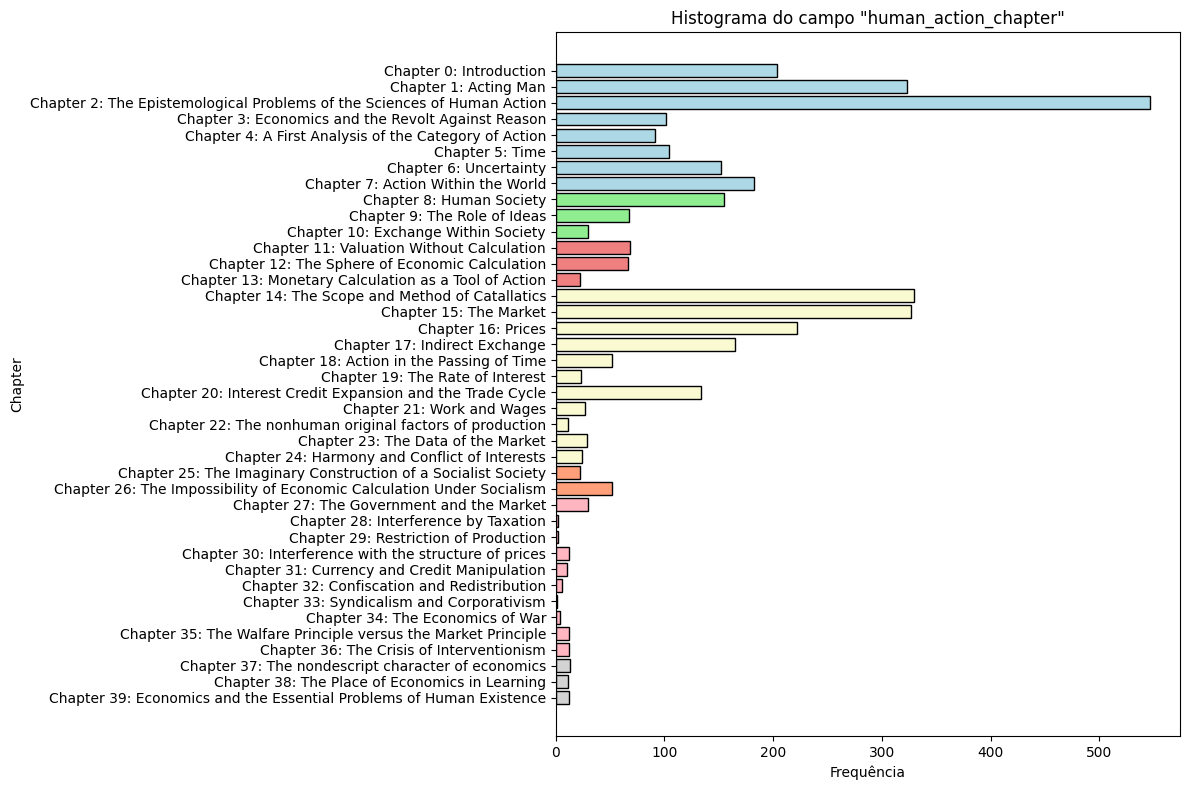

In [128]:
import matplotlib.pyplot as plt

# Simulating the DataFrame (example)
# data = {'human_action_chapter': ['Chapter 3', 'Chapter 1', 'not found', 'Chapter 2', 'Chapter 11', 'Chapter 1', 'not found']}
# mises_refs_df = pd.DataFrame(data)

# Drop rows where 'human_action_chapter' is "not found"
filtered_df = mises_refs_df[mises_refs_df['human_action_chapter_name'] != 'not found']

# Color mapping based on parts
part_colors = {
    1: 'lightblue',
    2: 'lightgreen',
    3: 'lightcoral',
    4: 'lightgoldenrodyellow',
    5: 'lightsalmon',
    6: 'lightpink',
    7: 'lightgray'
}


# Assign colors to each chapter based on its part
filtered_df['bar_color'] = filtered_df['human_action_part_number'].map(part_colors)

# Group by chapter and count occurrences, then sort by chapter number
chapter_counts_sorted = (
    filtered_df.groupby(['human_action_chapter_name', 'human_action_chapter_number', 'human_action_part_number', 'bar_color']).size().reset_index(name='counts')
    .sort_values(by='human_action_chapter_number', ascending=False)
)

# Plot the histogram with adjusted vertical space
plt.figure(figsize=(12, 8))  # Increased height for more vertical space
plt.barh(chapter_counts_sorted['human_action_chapter_name'], chapter_counts_sorted['counts'], 
         color=chapter_counts_sorted['bar_color'], edgecolor='black')

plt.title('Histograma do campo "human_action_chapter"')
plt.xlabel('Frequência')
plt.ylabel('Chapter')

# Adjust layout for better label display
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../reports/human_action_chapters.png')

# Show the plot
plt.show()


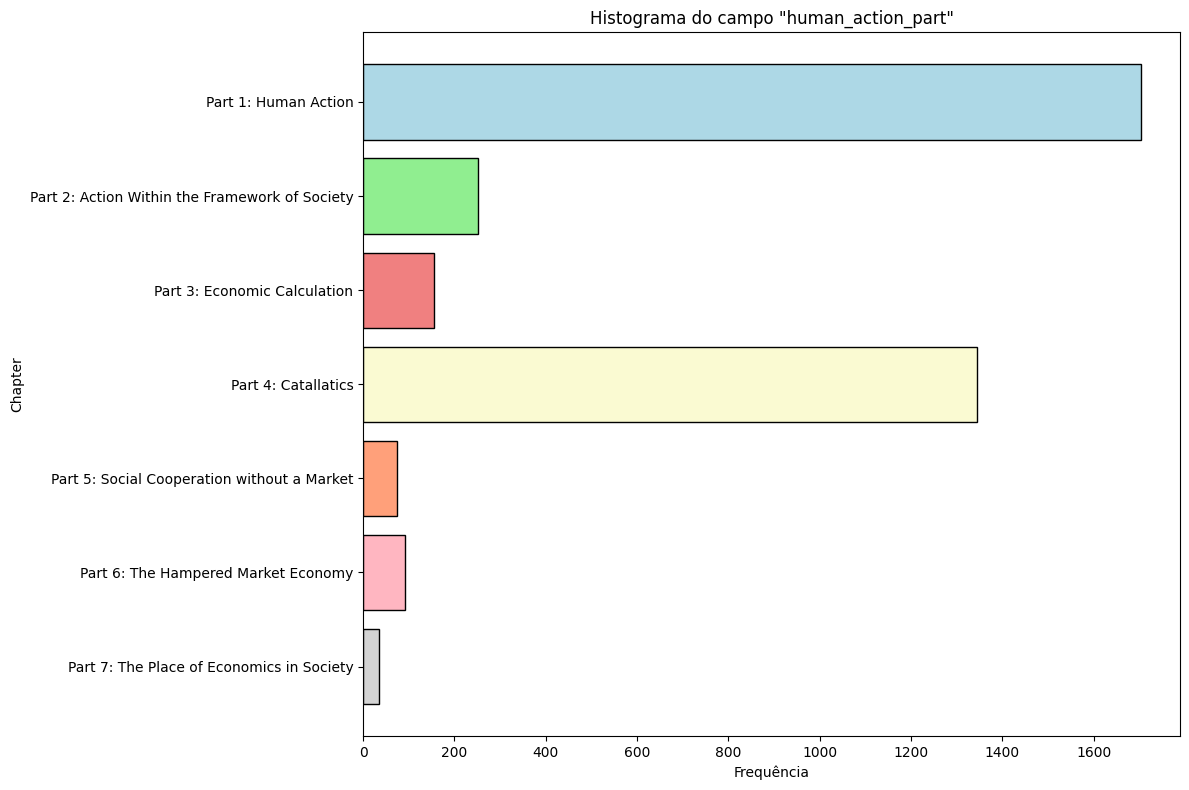

In [129]:
import matplotlib.pyplot as plt

# Simulating the DataFrame (example)
# data = {'human_action_chapter': ['Chapter 3', 'Chapter 1', 'not found', 'Chapter 2', 'Chapter 11', 'Chapter 1', 'not found']}
# mises_refs_df = pd.DataFrame(data)

# Drop rows where 'human_action_chapter' is "not found"
filtered_df = mises_refs_df[mises_refs_df['human_action_chapter_name'] != 'not found']

# Color mapping based on parts
part_colors = {
    1: 'lightblue',
    2: 'lightgreen',
    3: 'lightcoral',
    4: 'lightgoldenrodyellow',
    5: 'lightsalmon',
    6: 'lightpink',
    7: 'lightgray'
}


# Assign colors to each chapter based on its part
filtered_df['bar_color'] = filtered_df['human_action_part_number'].map(part_colors)

# Group by chapter and count occurrences, then sort by chapter number
chapter_counts_sorted = (
    filtered_df.groupby(['human_action_part_name', 'human_action_part_number', 'bar_color']).size().reset_index(name='counts')
    .sort_values(by='human_action_part_number', ascending=False)
)

# Plot the histogram with adjusted vertical space
plt.figure(figsize=(12, 8))  # Increased height for more vertical space
plt.barh(chapter_counts_sorted['human_action_part_name'], chapter_counts_sorted['counts'], 
         color=chapter_counts_sorted['bar_color'], edgecolor='black')

plt.title('Histograma do campo "human_action_part"')
plt.xlabel('Frequência')
plt.ylabel('Chapter')

# Adjust layout for better label display
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../reports/human_action_parts.png')

# Show the plot
plt.show()


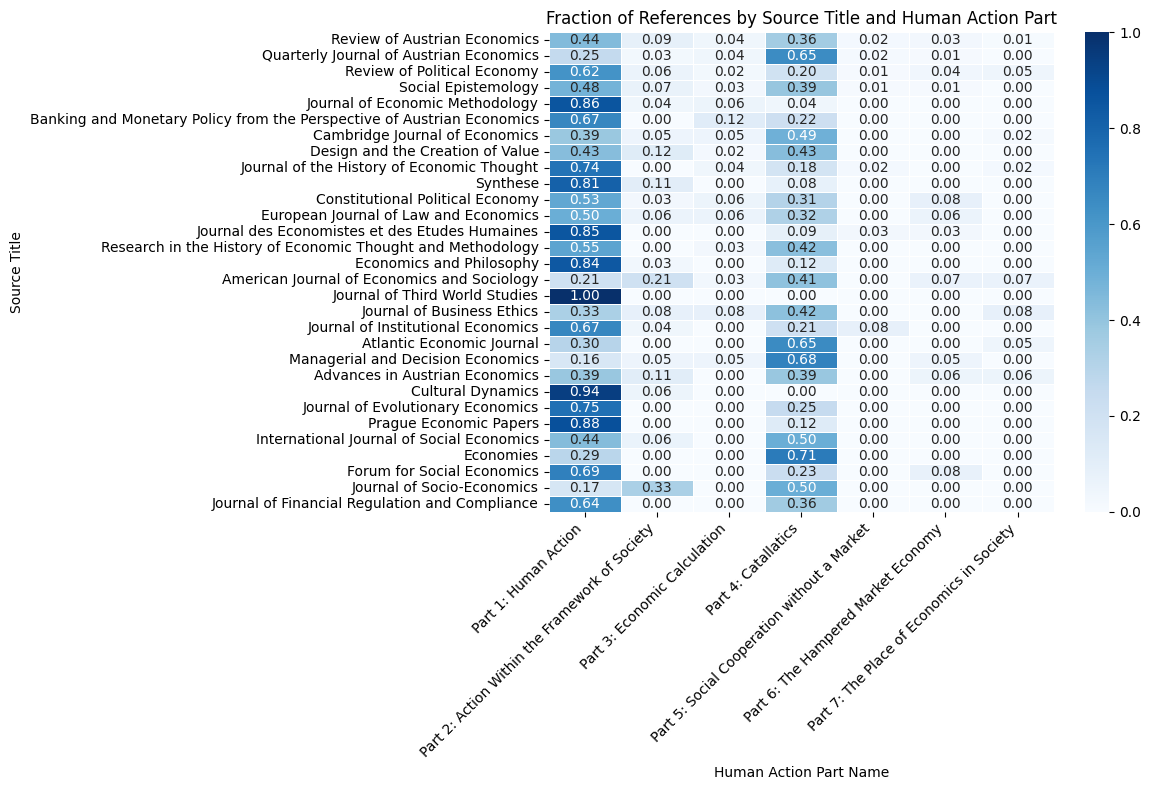

Heatmap saved to ../reports/mises_heatmap.png


In [130]:
'''
prompt:
Write python code that works with mises_refs_df.
Take the top 15 'Source title' and build a heat map showing the fraction of references (rows) that fall on each 'human_action_part_name'.

Sort 'Source title' from the most to the least frequent.

'''

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output directory exists
output_dir = "../reports/"
os.makedirs(output_dir, exist_ok=True)

# Get top 15 'Source title' considering only rows with non-NA page
top_sources = (
    mises_refs_df.loc[mises_refs_df['page'].notna(), 'source title']
    .value_counts()
    .head(30)
    .index
)

filtered_df = mises_refs_df[
    mises_refs_df['source title'].isin(top_sources) &
    mises_refs_df['page'].notna()
]

# Create a crosstab (count table)
count_table = pd.crosstab(
    filtered_df['source title'],
    filtered_df['human_action_part_name'],
    normalize='index'  # Normalize by row to get fractions
)

# Reorder rows from most to least frequent
ordered_index = (
    filtered_df['source title']
    .value_counts()
    .loc[top_sources]
    .index
)

# Reorder the count_table accordingly
count_table = count_table.loc[ordered_index]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(count_table, cmap="Blues", linewidths=0.5, annot=True, fmt=".2f")

plt.title("Fraction of References by Source Title and Human Action Part")
plt.xlabel("Human Action Part Name")
plt.ylabel("Source Title")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
output_path = os.path.join(output_dir, "mises_heatmap.png")
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Heatmap saved to {output_path}")
plt.close()


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output directory exists
output_dir = "../reports/"
os.makedirs(output_dir, exist_ok=True)

# Get top Source titles (com page não NA)
top_sources = (
    mises_refs_df.loc[mises_refs_df['page'].notna(), 'source title']
    .value_counts()
    .head(30)
    .index
)

filtered_df = mises_refs_df[
    mises_refs_df['source title'].isin(top_sources) &
    mises_refs_df['page'].notna()
]

# ----------------------------------------
# Top 10 chapters (by frequency)
# ----------------------------------------
top_chapters = (
    filtered_df['human_action_chapter_name']
    .value_counts()
    .head(10)
    .index
)

filtered_df['chapter_grouped'] = filtered_df['human_action_chapter_name'].where(
    filtered_df['human_action_chapter_name'].isin(top_chapters),
    other="Other"
)

# ----------------------------------------
# Build chapter → chapter_number map
# ----------------------------------------
chapter_number_map = (
    filtered_df.loc[
        filtered_df['chapter_grouped'] != "Other",
        ['human_action_chapter_name', 'human_action_chapter_number']
    ]
    .drop_duplicates()
    .set_index('human_action_chapter_name')['human_action_chapter_number']
    .to_dict()
)

# ----------------------------------------
# Crosstab (frações por Source title)
# ----------------------------------------
count_table = pd.crosstab(
    filtered_df['source title'],
    filtered_df['chapter_grouped'],
    normalize='index'
)

# Reorder rows (Source title)
ordered_index = (
    filtered_df['source title']
    .value_counts()
    .loc[top_sources]
    .index
)
count_table = count_table.loc[ordered_index]

# ----------------------------------------
# Sort columns by chapter_number, keep "Other" last
# ----------------------------------------
sorted_chapters = sorted(
    [c for c in count_table.columns if c != "Other"],
    key=lambda c: chapter_number_map.get(c, float('inf'))
)

if "Other" in count_table.columns:
    sorted_chapters.append("Other")

count_table = count_table[sorted_chapters]

# ----------------------------------------
# Plot heatmap
# ----------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(
    count_table,
    cmap="Blues",
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)

plt.title(
    "Fraction of References by Source Title and Human Action Chapter\n"
    "(Top 10 Chapters Ordered by Chapter Number + Other)"
)
plt.xlabel("Human Action Chapter")
plt.ylabel("Source Title")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure
output_path = os.path.join(
    output_dir,
    "mises_heatmap_top10_chapters_sorted_by_number.png"
)
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Heatmap saved to {output_path}")
plt.close()


SyntaxError: incomplete input (729956198.py, line 74)

In [132]:
'''
prompt:
_ é um pandas df com pares (paper_id, human_action_chapter_number). 
Gere código que gera uma matriz em que cada linha é um paper_id e cada coluna conta quantas ocorrências de human_action_chapter_number existem para este paper_id.
'''

import pandas as pd

# Supondo que mises_res_fd já esteja definido como um DataFrame com colunas:
# 'paper_id' e 'human_action_chapter_number'

# Cria a matriz de contagem (cada linha é um paper_id, cada coluna um capítulo, com as contagens)
chapter_matrix = pd.crosstab(
    index=mises_refs_df['paper_id'],
    columns=mises_refs_df['human_action_chapter_number']
)

# Renomeia as colunas para deixar claro que são capítulos
chapter_matrix.columns = [f'chapter_{col}' for col in chapter_matrix.columns]

chapter_matrix.shape



(871, 40)

C:\Users\pedro\AppData\Local\Temp\ipykernel_22516\2256698900.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chapter_grouped'] = filtered_df['human_action_chapter_name'].where(


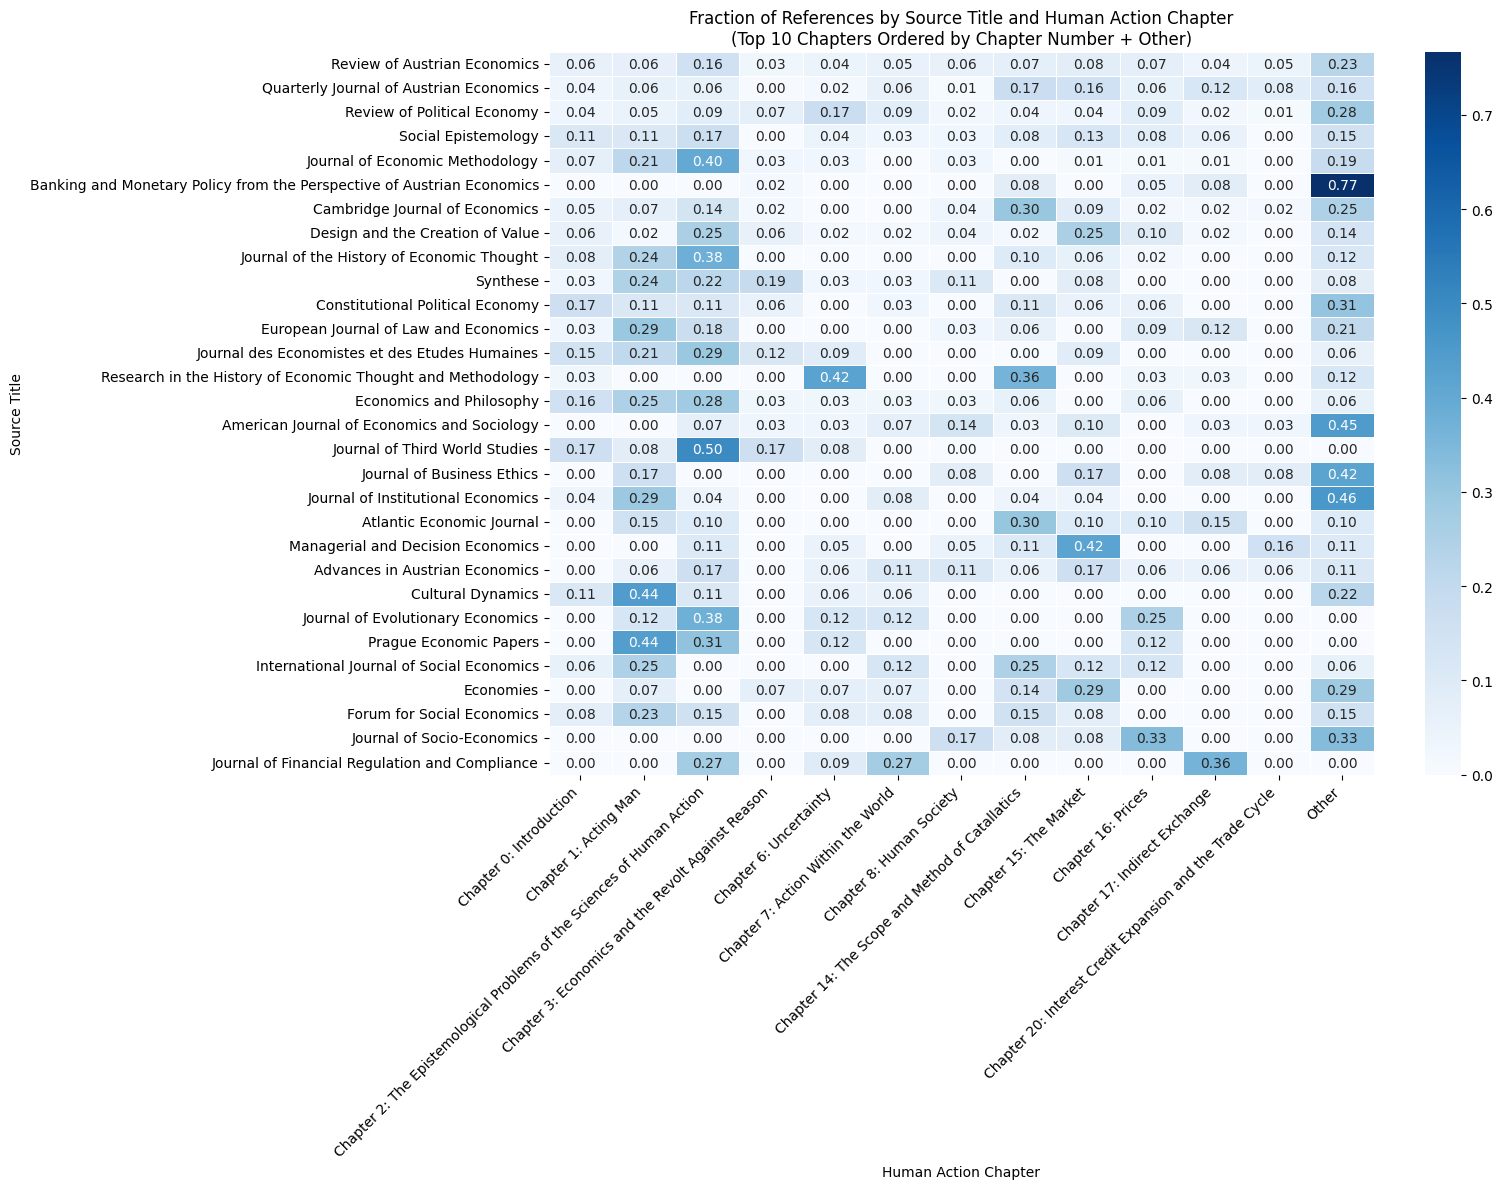

Heatmap saved to ../reports/mises_heatmap_top10_chapters_sorted_by_number.png


In [160]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output directory exists
output_dir = "../reports/"
os.makedirs(output_dir, exist_ok=True)

# Get top Source titles (com page não NA)
top_sources = (
    mises_refs_df.loc[mises_refs_df['page'].notna(), 'source title']
    .value_counts()
    .head(30)
    .index
)

filtered_df = mises_refs_df[
    mises_refs_df['source title'].isin(top_sources) &
    mises_refs_df['page'].notna()
]

# ----------------------------------------
# Top 10 chapters (by frequency)
# ----------------------------------------
top_chapters = (
    filtered_df['human_action_chapter_name']
    .value_counts()
    .head(12)
    .index
)

filtered_df['chapter_grouped'] = filtered_df['human_action_chapter_name'].where(
    filtered_df['human_action_chapter_name'].isin(top_chapters),
    other="Other"
)

# ----------------------------------------
# Build chapter → chapter_number map
# ----------------------------------------
chapter_number_map = (
    filtered_df.loc[
        filtered_df['chapter_grouped'] != "Other",
        ['human_action_chapter_name', 'human_action_chapter_number']
    ]
    .drop_duplicates()
    .set_index('human_action_chapter_name')['human_action_chapter_number']
    .to_dict()
)

# ----------------------------------------
# Crosstab (frações por Source title)
# ----------------------------------------
count_table = pd.crosstab(
    filtered_df['source title'],
    filtered_df['chapter_grouped'],
    normalize='index'
)

# Reorder rows (Source title)
ordered_index = (
    filtered_df['source title']
    .value_counts()
    .loc[top_sources]
    .index
)
count_table = count_table.loc[ordered_index]

# ----------------------------------------
# Sort columns by chapter_number, keep "Other" last
# ----------------------------------------
sorted_chapters = sorted(
    [c for c in count_table.columns if c != "Other"],
    key=lambda c: chapter_number_map.get(c, float('inf'))
)

if "Other" in count_table.columns:
    sorted_chapters.append("Other")

count_table = count_table[sorted_chapters]

# ----------------------------------------
# Plot heatmap
# ----------------------------------------
plt.figure(figsize=(16, 12))
sns.heatmap(
    count_table,
    cmap="Blues",
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)

plt.title(
    "Fraction of References by Source Title and Human Action Chapter\n"
    "(Top 10 Chapters Ordered by Chapter Number + Other)"
)
plt.xlabel("Human Action Chapter")
plt.ylabel("Source Title")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure
output_path = os.path.join(
    output_dir,
    "mises_heatmap_top10_chapters_sorted_by_number.png"
)
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Heatmap saved to {output_path}")
plt.close()


In [134]:
part_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 14 to 2458
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   part_1.0  871 non-null    int64
 1   part_2.0  871 non-null    int64
 2   part_3.0  871 non-null    int64
 3   part_4.0  871 non-null    int64
 4   part_5.0  871 non-null    int64
 5   part_6.0  871 non-null    int64
 6   part_7.0  871 non-null    int64
dtypes: int64(7)
memory usage: 54.4 KB


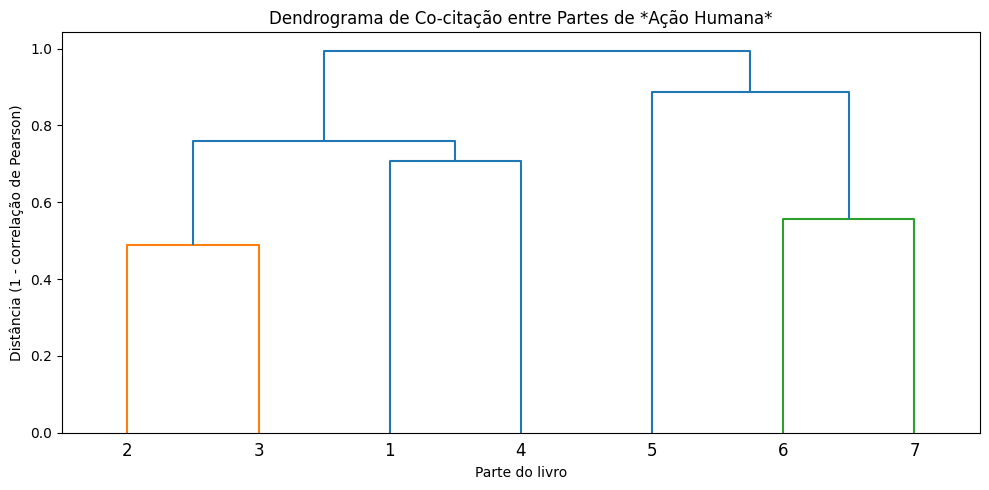

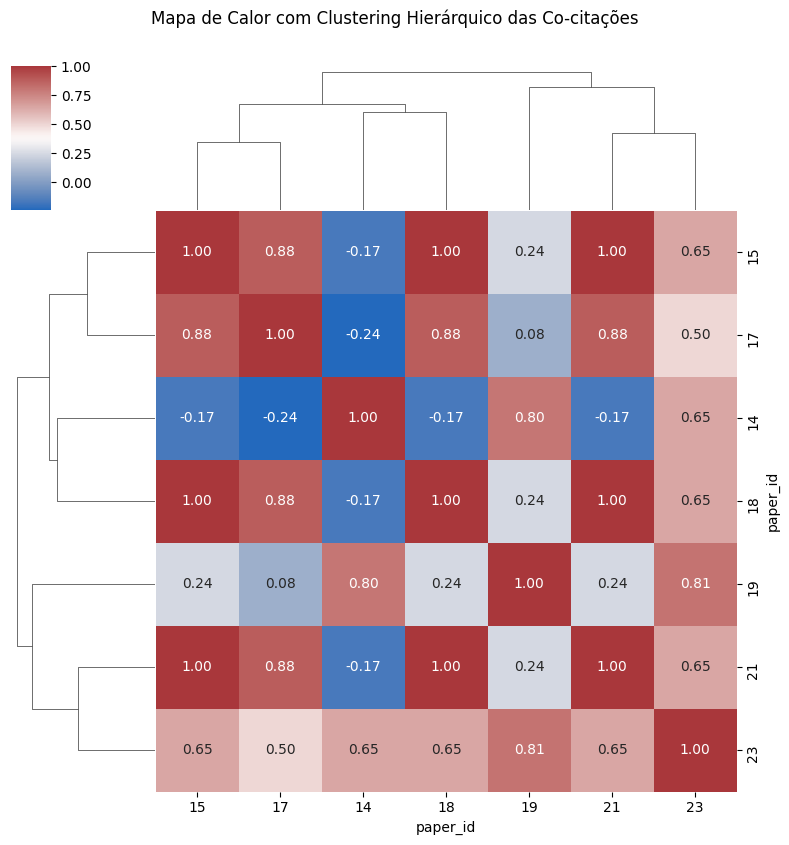


=== Clusters de partes do livro ===
  Parte  Cluster
1     2        1
2     3        1
0     1        2
3     4        3
5     6        4
6     7        5
4     5        6


In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# =====================
# 1. Preparação: Matriz de co-citação
# =====================

# Transforma a matriz de papers x partes para partes x papers
part_by_paper = part_matrix.T

# Calcula a matriz de correlação entre as partes (para visualização)
correlation_matrix = part_by_paper.corr()

# Calcula a matriz de distância baseada em correlação de Pearson (1 - r)
# pdist retorna formato "condensed" automaticamente
distance_condensed = pdist(part_by_paper, metric='correlation')

# =====================
# 2. Clustering hierárquico
# =====================

# Aplica o clustering (método 'average', mas você pode testar 'ward' ou 'complete')
linked = linkage(distance_condensed, method='complete')

# =====================
# 3. Dendrograma
# =====================

# Nomes amigáveis para os capítulos
labels = [col.replace("part_", "").replace(".0", "") for col in part_matrix.columns]

plt.figure(figsize=(10, 5))
dendrogram(linked, labels=labels)
plt.title("Dendrograma de Co-citação entre Partes de *Ação Humana*")
plt.xlabel("Parte do livro")
plt.ylabel("Distância (1 - correlação de Pearson)")
plt.tight_layout()
plt.show()

# =====================
# 4. Clustermap
# =====================

sns.clustermap(
    correlation_matrix,
    row_linkage=linked,
    col_linkage=linked,
    cmap="vlag",         # "coolwarm", "RdBu_r", etc. também funcionam
    annot=True,
    fmt=".2f",
    figsize=(8, 8)
)
plt.suptitle("Mapa de Calor com Clustering Hierárquico das Co-citações", y=1.05)
plt.show()

# =====================
# 5. (Opcional) Extrair clusters
# =====================

# Escolha a distância máxima entre itens do mesmo cluster (ajuste conforme necessário)
max_dist = 0.5
cluster_labels = fcluster(linked, max_dist, criterion='distance')

# Cria um dataframe com os resultados
clusters_df = pd.DataFrame({
    'Parte': part_matrix.columns,
    'Cluster': cluster_labels
})

# Limpa os nomes
clusters_df['Parte'] = clusters_df['Parte'].str.replace("part_", "").str.replace(".0", "")
clusters_df = clusters_df.sort_values(by='Cluster')

print("\n=== Clusters de partes do livro ===")
print(clusters_df)


In [136]:
linked

array([[ 1.        ,  2.        ,  0.48978142,  2.        ],
       [ 5.        ,  6.        ,  0.55517879,  2.        ],
       [ 0.        ,  3.        ,  0.70657603,  2.        ],
       [ 7.        ,  9.        ,  0.75921775,  4.        ],
       [ 4.        ,  8.        ,  0.88730108,  3.        ],
       [10.        , 11.        ,  0.99250949,  7.        ]])

In [137]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [138]:
pd.set_option('display.max_rows', None)


from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# 1. Transformar a matrix de contagens em booleana (1 se capítulo apareceu, 0 caso contrário)
chapter_bool = chapter_matrix > 0

# 2. Minerar os itemsets frequentes (frequência mínima ajustável com min_support)
frequent_itemsets = apriori(chapter_bool, min_support=0.01, use_colnames=True)


frequent_itemsets.sort_values(by='support', ascending=False).head(100) 


,support,itemsets
2,0.257176,(chapter_2.0)
1,0.215844,(chapter_1.0)
15,0.197474,(chapter_15.0)
14,0.192882,(chapter_14.0)
7,0.141217,(chapter_7.0)
16,0.129736,(chapter_16.0)
0,0.117107,(chapter_0.0)
46,0.103330,"(chapter_2.0, chapter_1.0)"
17,0.092997,(chapter_17.0)
6,0.091848,(chapter_6.0)


In [139]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

pd.set_option('display.max_rows', None)

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

pd.set_option('display.max_rows', None)

# 1. Transformar a matriz de contagens em booleana (1 se capítulo apareceu, 0 caso contrário)
part_bool = part_matrix > 0

# 2. Minerar os itemsets frequentes
frequent_itemsets = apriori(part_bool, min_support=0.01, use_colnames=True)

# 3. Identificar closed itemsets
def is_closed(row, all_itemsets_df):
    current_items = set(row['itemsets'])
    current_support = row['support']
    for _, other_row in all_itemsets_df.iterrows():
        other_items = set(other_row['itemsets'])
        other_support = other_row['support']
        if current_items < other_items and current_support == other_support:
            return False
    return True

frequent_itemsets['is_closed'] = frequent_itemsets.apply(lambda row: is_closed(row, frequent_itemsets), axis=1)

# 4. Filtrar apenas os closed itemsets
closed_itemsets = frequent_itemsets[frequent_itemsets['is_closed']]

# 5. Exibir
frequent_itemsets.sort_values(by='support', ascending=False).head(100)


,support,itemsets,is_closed
0,0.590126,(part_1.0),True
3,0.535017,(part_4.0),True
9,0.216992,"(part_4.0, part_1.0)",True
1,0.146958,(part_2.0),True
2,0.119403,(part_3.0),True
7,0.101033,"(part_2.0, part_1.0)",True
14,0.089552,"(part_4.0, part_2.0)",True
8,0.072331,"(part_3.0, part_1.0)",True
5,0.068886,(part_6.0),True
18,0.067738,"(part_4.0, part_3.0)",True


In [140]:
part_matrix.head()

,part_1.0,part_2.0,part_3.0,part_4.0,part_5.0,part_6.0,part_7.0
paper_id,,,,,,,
14,1,0,0,0,0,0,0
15,0,0,0,1,0,0,0
17,0,1,0,2,0,0,0
18,0,0,0,4,0,0,0
19,2,0,1,1,0,0,0


In [141]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Normalizar os dados (importante para PCA)
scaler = StandardScaler()
part_matrix_scaled = scaler.fit_transform(part_matrix)

# 2. Aplicar PCA
pca = PCA()
pca.fit(part_matrix_scaled)

# 3. Mostrar a % de variação explicada por componente
explained_variance_ratio = pca.explained_variance_ratio_

for i, var in enumerate(explained_variance_ratio, start=1):
    print(f'Componente {i}: {var:.2%} da variância explicada')

print('\nComponentes principais (loadings):')
# Cria um DataFrame para mostrar os componentes com nomes das variáveis
loadings_df = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)], 
    index=part_matrix.columns
)
print(loadings_df)


Componente 1: 33.35% da variância explicada
Componente 2: 18.43% da variância explicada
Componente 3: 13.93% da variância explicada
Componente 4: 10.88% da variância explicada
Componente 5: 10.08% da variância explicada
Componente 6: 7.26% da variância explicada
Componente 7: 6.08% da variância explicada

Componentes principais (loadings):
               PC1       PC2       PC3       PC4       PC5       PC6       PC7
part_1.0  0.334807 -0.341378 -0.340096  0.545541 -0.580867  0.142491  0.019374
part_2.0  0.526697 -0.073982  0.070121 -0.334519  0.015541 -0.008664  0.774584
part_3.0  0.423545 -0.300283  0.346483 -0.469342 -0.180531  0.247380 -0.544352
part_4.0  0.355593 -0.392744 -0.072708  0.330910  0.752693 -0.128651 -0.146354
part_5.0  0.218572  0.311515  0.760070  0.473361 -0.107060 -0.204129  0.016618
part_6.0  0.308807  0.607700 -0.199079  0.110282  0.200294  0.660720 -0.082917
part_7.0  0.401899  0.408937 -0.369786 -0.156412 -0.107860 -0.650887 -0.273412


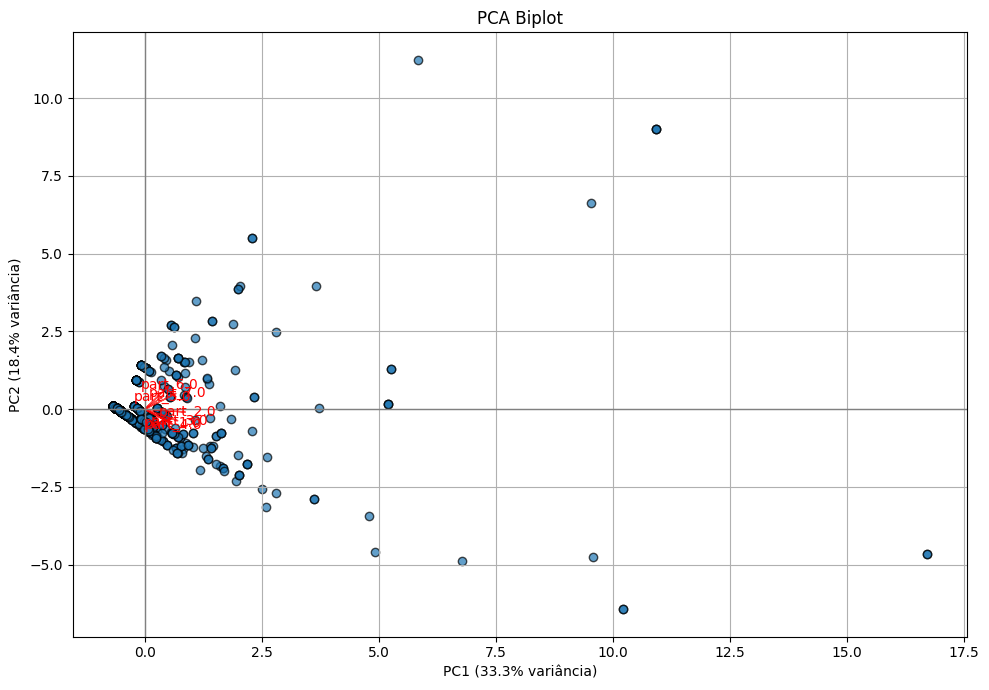

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(part_matrix)

# 2. Aplicar PCA e pegar os 2 primeiros componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Preparar o gráfico
fig, ax = plt.subplots(figsize=(10, 7))

# Plot dos pontos dos dados nos 2 primeiros PCs
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolor='k')

# 4. Plotar as setas das variáveis originais (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

feature_names = part_matrix.columns

for i, feature in enumerate(feature_names):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1],
             color='r', alpha=0.7, head_width=0.05)
    ax.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, 
            color='r', ha='center', va='center')

# 5. Configurações do gráfico
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variância)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variância)')
ax.set_title('PCA Biplot')
ax.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.tight_layout()
plt.show()
